![](https://www.bing.com/images/search?view=detailV2&ccid=T2QoJuJG&id=E75578CF56A73AB9A7C6447EBCC61C16002C2A0C&thid=OIP.T2QoJuJGYMJj-Tp5E1Jf-wHaFy&mediaurl=https%3a%2f%2fcdn.images.express.co.uk%2fimg%2fdynamic%2fgalleries%2fx701%2f312168.jpg&exph=701&expw=898&q=electric+vehicles+tesla&simid=607992349406464966&FORM=IRPRST&ck=255D0C4587E366A6C128CA6D7B1C6FD9&selectedIndex=5&ajaxhist=0&ajaxserp=0)

**Import of Packages**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

**Import of the CSV file**

In [2]:
df= pd.read_csv('ElectricCarData_Clean.csv')

In [3]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

**Top five rows of the dataset**

In [4]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


**Finding out the number of null values**

In [5]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

There exists no null value

**Descriptive Statistics of the dataset**

In [6]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


**Information of the ype of data in seach column**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [8]:
a=np.arange(1,104)

**Pairplot of all the columns based on Rapid Charger presence**

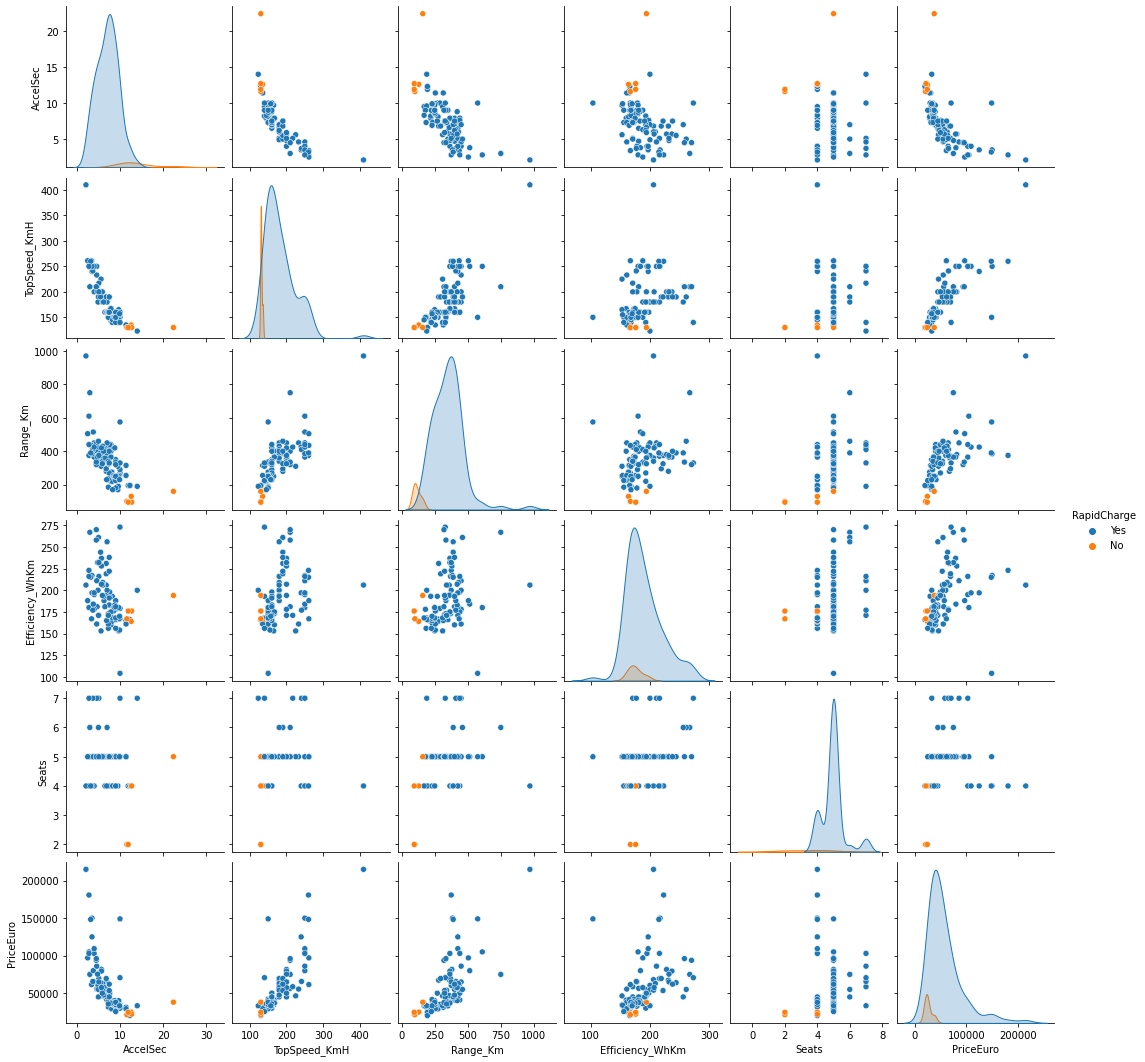

In [9]:
sb.pairplot(df,hue='RapidCharge')

**Heatmap to show the correlation of the data**

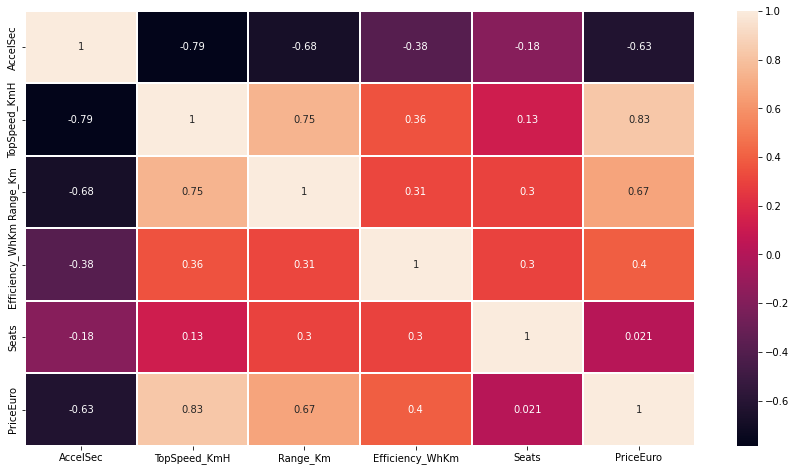

In [10]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

**Frequency of the Brands in the dataset**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

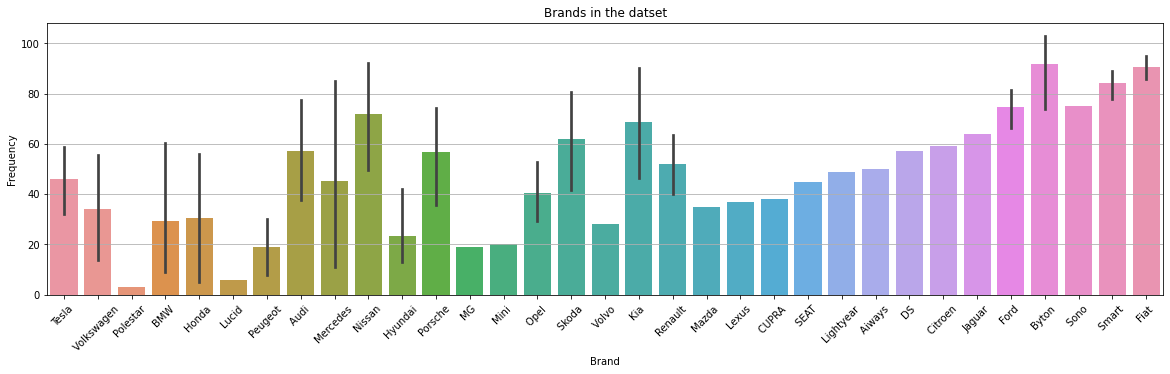

In [11]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Byton , Fiat and smart are the prominent brands and Polestar being the least 

**Top speeds achieved by the cars of a brand**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

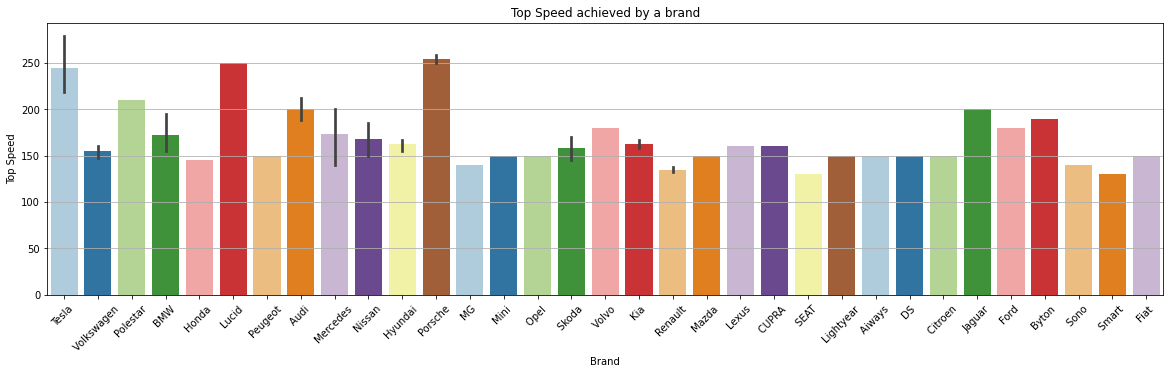

In [12]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest



**Range a car can achieve**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

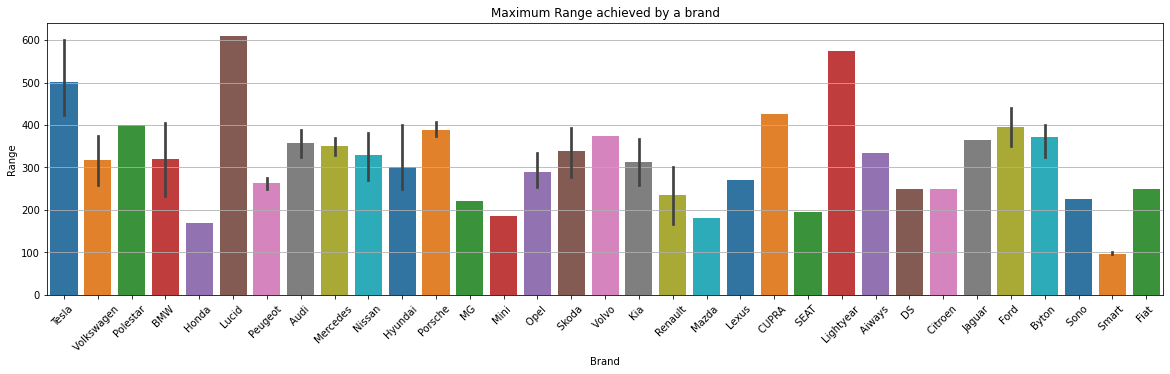

In [13]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest


**Car efficiency**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

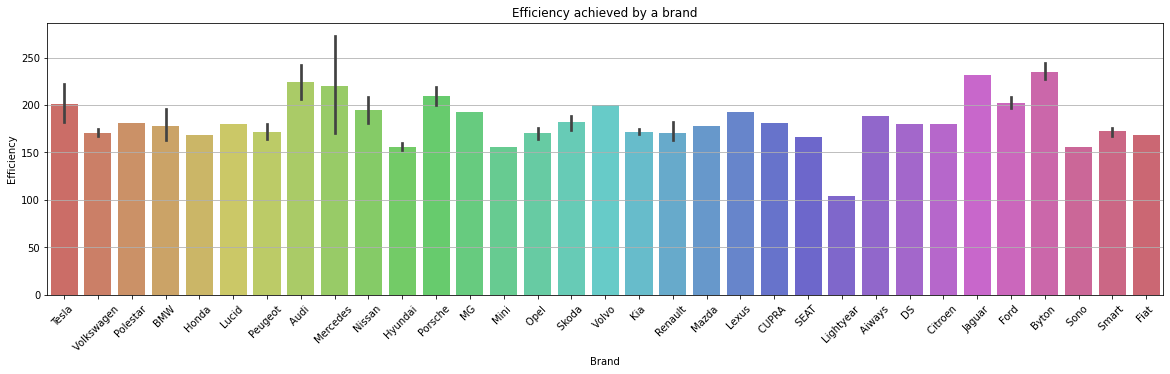

In [14]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Byton , Jaguar and Audi are the most efficient and Lightyear the least

**Number of seats in each car**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

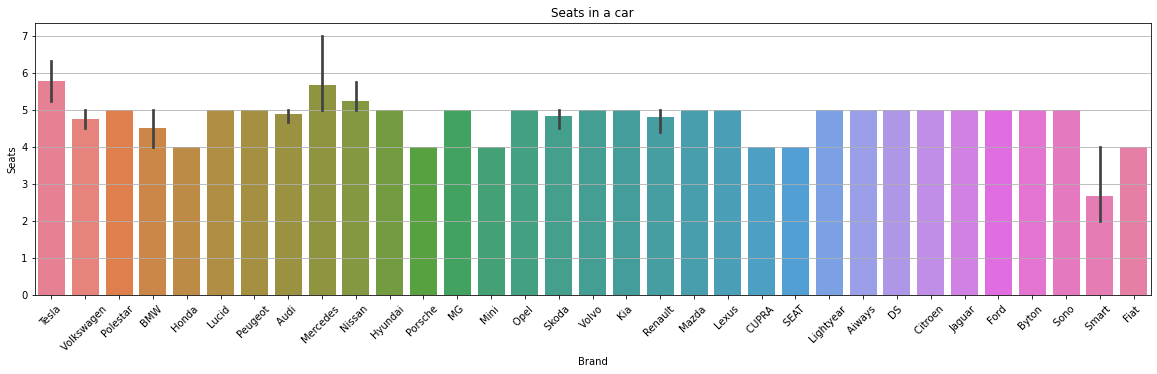

In [15]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

**Price of cars (in Euro)**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

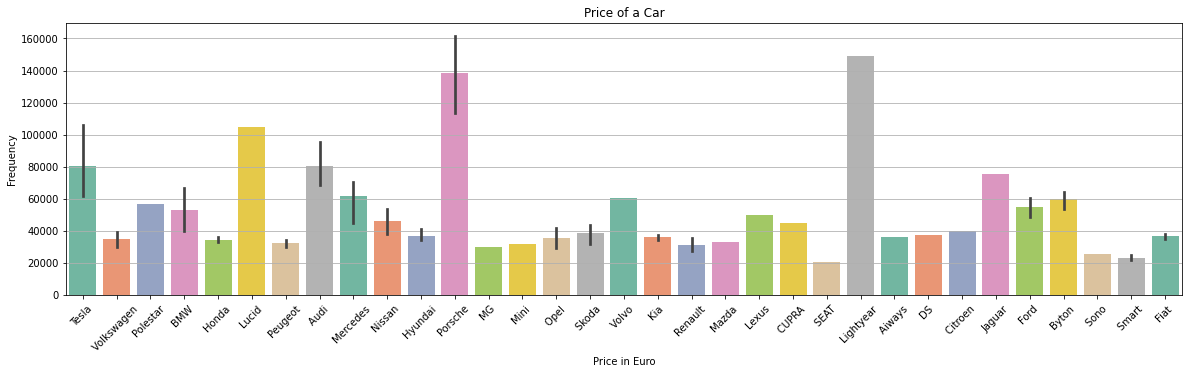

In [16]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='PriceEuro',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

**Type of Plug used for charging**

Text(0.5, 1.0, 'Plug Type')

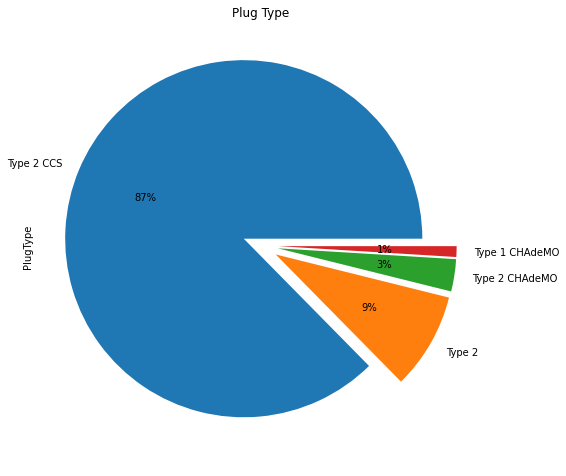

In [17]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCS and Type 1 CHAdeMo the least

**Cars and their body style**

Text(0.5, 1.0, 'Body Style')

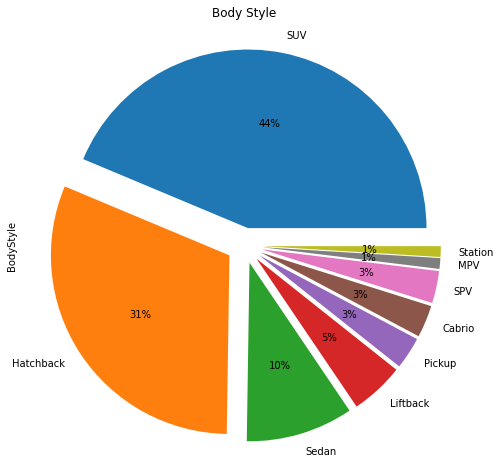

In [18]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are eiher SUV or Hatchback  

**Segment in which the cars fall under**

Text(0.5, 1.0, 'Segment')

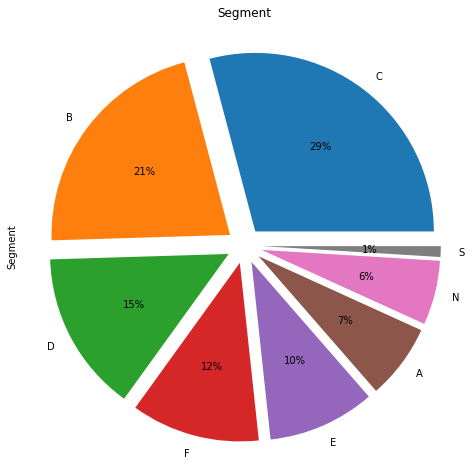

In [19]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type 


**Number of Seats**

Text(0.5, 1.0, 'Seats')

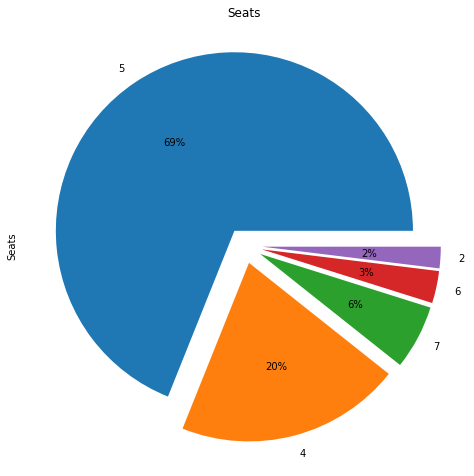

In [20]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats 

**Putting independent variables as x and dependent variable as y**

In [21]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [23]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [24]:
# Check unique values and their counts
print(df['FastCharge_KmH'].value_counts())


230    6
440    5
540    5
-      5
380    5
470    4
560    4
190    4
260    3
170    3
420    3
210    3
490    2
710    2
270    2
450    2
350    2
330    2
590    2
550    2
340    2
480    2
650    2
220    2
620    2
390    2
410    1
770    1
460    1
740    1
360    1
810    1
290    1
430    1
510    1
320    1
890    1
940    1
520    1
900    1
920    1
730    1
610    1
570    1
240    1
250    1
910    1
850    1
930    1
780    1
500    1
Name: FastCharge_KmH, dtype: int64


In [25]:
# Check for non-numeric values
non_numeric = df[~df['FastCharge_KmH'].str.isnumeric()]
print(non_numeric)


       Brand              Model  AccelSec  TopSpeed_KmH  Range_Km  \
57  Renault           Twingo ZE      12.6           135       130   
68  Renault   Kangoo Maxi ZE 33      22.4           130       160   
77    Smart         EQ forfour       12.7           130        95   
82    Smart     EQ fortwo coupe      11.6           130       100   
91    Smart    EQ fortwo cabrio      11.9           130        95   

    Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain PlugType  BodyStyle  \
57              164              -          No        RWD   Type 2  Hatchback   
68              194              -          No        FWD   Type 2        SPV   
77              176              -          No        RWD   Type 2  Hatchback   
82              167              -          No        RWD   Type 2  Hatchback   
91              176              -          No        RWD   Type 2     Cabrio   

   Segment  Seats  PriceEuro  
57       A      4      24790  
68       N      5      38000  
77   

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [27]:
# First, replace or fill any non-numeric values (if needed)
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')  # Converts invalid strings to NaN

# Optionally, you can fill NaNs with a specific value like 0 if required
df['FastCharge_KmH'] = df['FastCharge_KmH'].fillna(0)

# Convert to integer type
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype(int)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [29]:
# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv')

# Step 1: Identify object type columns
object_columns = df.select_dtypes(include=['object']).columns

# Dictionary to store mappings for each column
mappings = {}

# Step 2: Create mappings and convert to numbers
for col in object_columns:
    # Step 3: Get unique values and create a mapping to numbers
    unique_values = df[col].unique()
    value_mapping = {value: idx for idx, value in enumerate(unique_values)}
    
    # Save the mapping dictionary for this column
    mappings[col] = value_mapping
    
    # Step 4: Apply the mapping to the column
    df[col] = df[col].map(value_mapping)

# Step 5: Display the mappings
for col, mapping in mappings.items():
    print(f"Mapping for column '{col}':")
    print(mapping)

# Now 'df' has object columns converted to numeric values
print("\nUpdated DataFrame with numeric values:")
print(df.head())

Mapping for column 'Brand':
{'Tesla ': 0, 'Volkswagen ': 1, 'Polestar ': 2, 'BMW ': 3, 'Honda ': 4, 'Lucid ': 5, 'Peugeot ': 6, 'Audi ': 7, 'Mercedes ': 8, 'Nissan ': 9, 'Hyundai ': 10, 'Porsche ': 11, 'MG ': 12, 'Mini ': 13, 'Opel ': 14, 'Skoda ': 15, 'Volvo ': 16, 'Kia ': 17, 'Renault ': 18, 'Mazda ': 19, 'Lexus ': 20, 'CUPRA ': 21, 'SEAT ': 22, 'Lightyear ': 23, 'Aiways ': 24, 'DS ': 25, 'Citroen ': 26, 'Jaguar ': 27, 'Ford ': 28, 'Byton ': 29, 'Sono ': 30, 'Smart ': 31, 'Fiat ': 32}
Mapping for column 'Model':
{'Model 3 Long Range Dual Motor': 0, 'ID.3 Pure': 1, '2': 2, 'iX3 ': 3, 'e ': 4, 'Air ': 5, 'e-Golf ': 6, 'e-208 ': 7, 'Model 3 Standard Range Plus': 8, 'Q4 e-tron ': 9, 'EQC 400 4MATIC': 10, 'Leaf ': 11, 'Kona Electric 64 kWh': 12, 'i4 ': 13, 'IONIQ Electric': 14, 'ID.3 Pro S': 15, 'Taycan Turbo S': 16, 'e-Up! ': 17, 'ZS EV': 18, 'Cooper SE ': 19, 'Corsa-e ': 20, 'Model Y Long Range Dual Motor': 21, 'Enyaq iV 50': 22, 'e-tron GT ': 23, 'Model 3 Long Range Performance': 24, '

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    int64  
 1   Model            103 non-null    int64  
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    int64  
 9   PlugType         103 non-null    int64  
 10  BodyStyle        103 non-null    int64  
 11  Segment          103 non-null    int64  
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 11.4 KB


In [31]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

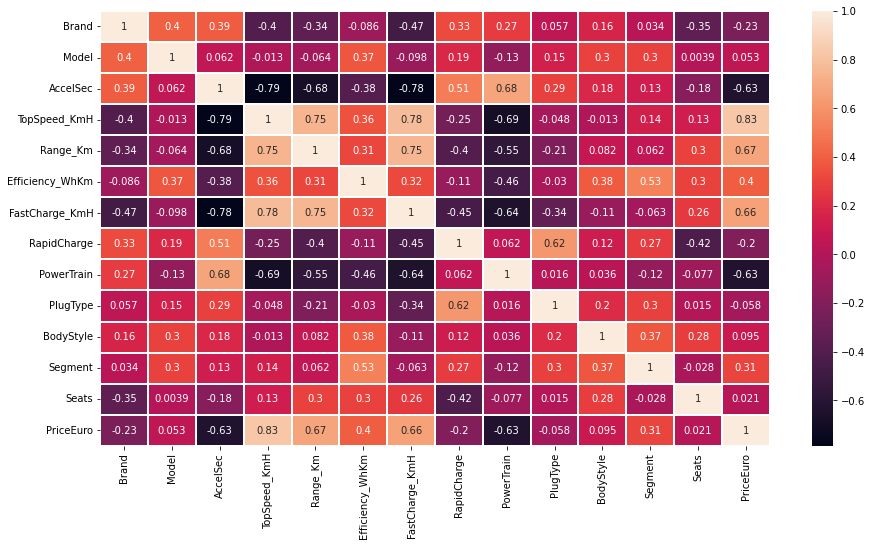

In [32]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

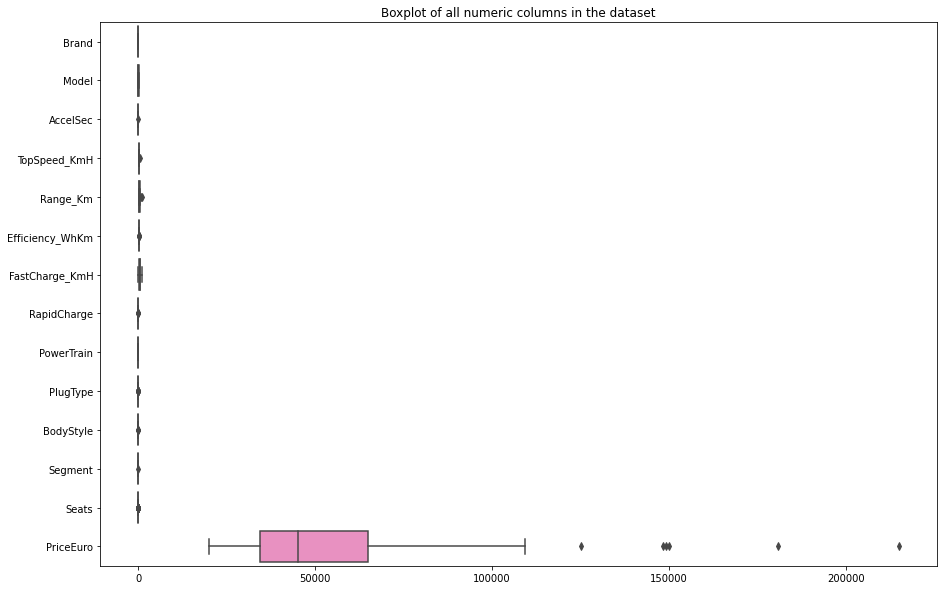

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame containing your data
# If your data is not already loaded, load it with something like:
# df = pd.read_csv('your_data.csv')

# Select only numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for all numeric columns to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.title('Boxplot of all numeric columns in the dataset')
plt.show()

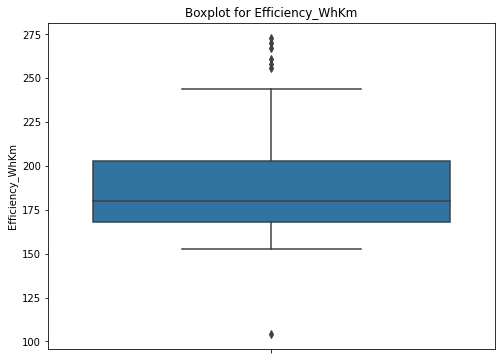

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the boxplot for 'Efficiency_WhKm' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Efficiency_WhKm'])
plt.title('Boxplot for Efficiency_WhKm')
plt.ylabel('Efficiency_WhKm')
plt.show()

Data after removing outliers:
     Brand  Model  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0        0      0       4.6           233       450              161   
1        1      1      10.0           160       270              167   
2        2      2       4.7           210       400              181   
3        3      3       6.8           180       360              206   
4        4      4       9.5           145       170              168   
..     ...    ...       ...           ...       ...              ...   
97      29     96       7.5           190       325              222   
98       9     97       7.5           160       330              191   
100      9     99       5.9           200       325              194   
101      9    100       5.1           200       375              232   
102     29    101       7.5           190       400              238   

     FastCharge_KmH  RapidCharge  PowerTrain  PlugType  BodyStyle  Segment  \
0               940        

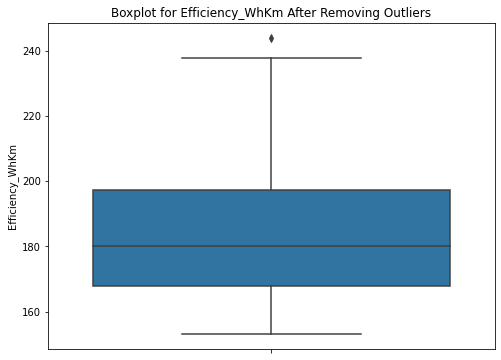

In [35]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Efficiency_WhKm'].quantile(0.25)
Q3 = df['Efficiency_WhKm'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Efficiency_WhKm'] >= lower_bound) & (df['Efficiency_WhKm'] <= upper_bound)]

# Display the filtered DataFrame
print("Data after removing outliers:")
print(df_filtered)

# Optionally, you can visualize the boxplot again to check if outliers are removed
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered['Efficiency_WhKm'])
plt.title('Boxplot for Efficiency_WhKm After Removing Outliers')
plt.ylabel('Efficiency_WhKm')
plt.show()


In [36]:
df=df_filtered

In [37]:
x=df[['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']]
y=df['Efficiency_WhKm']

In [38]:
x=df[['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']]
y=df['Efficiency_WhKm']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=8)

**Importing Linear regression**

In [41]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [42]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

**Finding out the R-squared value**

In [43]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

79.4985719373601


In [44]:
# Import necessary libraries for additional models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# List to store the results
results = []

# Helper function to train model and calculate r2 and mse
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # R² Score
    r2 = r2_score(y_test, pred)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred)
    
    print("accuracy",r2,"---loss---",mse)
    
    # Save the result
    results.append({'Model': model_name, 'R2 Score (%)': r2 * 100, 'MSE': mse})

In [45]:
# 1. Linear Regression (already done)
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test, 'Linear Regression')

accuracy 0.794985719373601 ---loss--- 144.14527255656773


In [46]:
# 2. Random Forest Regressor
rf = RandomForestRegressor(random_state=365)
evaluate_model(rf, X_train, X_test, y_train, y_test, 'Random Forest Regressor')


accuracy 0.8051704132885511 ---loss--- 136.98442758620692


In [47]:
# 3. Support Vector Regressor (SVR)
svr = SVR()
evaluate_model(svr, X_train, X_test, y_train, y_test, 'SVR')

accuracy 0.08989114364099926 ---loss--- 639.8963465139301


In [48]:
# 4. XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=365)
evaluate_model(xgb, X_train, X_test, y_train, y_test, 'XGBoost Regressor')


accuracy 0.7917508648315803 ---loss--- 146.4196945539804


In [49]:
# 5. Decision Tree Regressor (as an additional model)
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=365)
evaluate_model(dt, X_train, X_test, y_train, y_test, 'Decision Tree Regressor')


accuracy 0.7273154677950164 ---loss--- 191.72413793103448


In [50]:
# Display the results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                     Model  R2 Score (%)         MSE
0        Linear Regression     79.498572  144.145273
1  Random Forest Regressor     80.517041  136.984428
2                      SVR      8.989114  639.896347
3        XGBoost Regressor     79.175086  146.419695
4  Decision Tree Regressor     72.731547  191.724138


In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import r2_score


# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
pred = rf.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, pred)
print(f'R-squared score: {r2 * 100:.2f}%')

# Save the model as a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


R-squared score: 80.93%


In [52]:
# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
loaded_pred = loaded_model.predict(X_test)

# Calculate R-squared score for loaded model
loaded_r2 = r2_score(y_test, loaded_pred)
print(f'Loaded model R-squared score: {loaded_r2 * 100:.2f}%')


Loaded model R-squared score: 80.93%
